In [1]:
import numpy as np 
import scienceplots # Para obtener graficos de alta calidad
import matplotlib.pyplot as plt
from tqdm import tqdm # para barra de progreso
import time
from sympy import init_printing
init_printing() # Esto es para renderizar las tuplas correctamente

# se pone al inicio por si se interrumpe la ejecución para que no te salga raro en la siguiente ejecución
# barra_progreso.close()

plt.style.use(['science','notebook','grid','std-colors'])
#plt.style.use(['nature','no-latex'])

## Matriz del centro NV 
$$ \mathcal{H}/h = D(S_z^{2} - \frac{S(S+1)}{3}) + E(S_x^{2} - S_y^{2}) + \gamma B\cdot S $$

donde:
\begin{align}
D &= 2.87 \; GHz & \gamma &= \frac{g_e \mu_B}{\hbar} = 28 \;GHz/T \\
E &= 5 \; MHz & S&=1
\end{align}

Los operadores de spin 1
\begin{align}
S_x &= \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0& 1& 0 \end{pmatrix} &
S_y &= \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & -i & 0 \\ i & 0 & -i \\ 0& i& 0 \end{pmatrix} &
S_z &= \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -1 \end{pmatrix}
\end{align}

Se usa los autovectores de $S_z:  \quad \{ |1\rangle = |+1\rangle\;;\; |2\rangle = |0\rangle\;;\; |3\rangle = |-1\rangle \}$


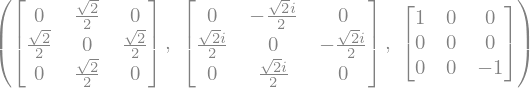

In [2]:
# Escribimos los operadores a usar
from sympy import Matrix, Rational, sqrt, I,re

# Los operadores espín S=1
S_x = 1/sqrt(2)*Matrix([[0,1,0],[1,0,1],[0,1,0]])
S_y = 1/sqrt(2)*Matrix([[0,-I,0],[I,0,-I],[0,I,0]])
S_z = Matrix([[1,0,0],[0,0,0],[0,0,-1]])
display((S_x,S_y,S_z))

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\JAAL_\AppData\Local\Temp\ipykernel_26908\3661812781.py:3: SyntaxWarning: invalid escape sequence '\g'
  D,E,gamma,B_x,B_y,B_z = symbols('D E \gamma B_x B_y B_z', real=True)


El hamiltoniano del centro NV es:


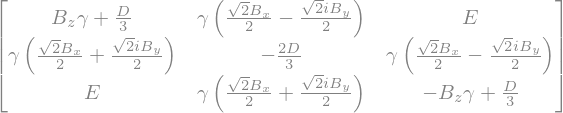

In [3]:
# expresamos el Hamiltoniano
from sympy import symbols, eye
D,E,gamma,B_x,B_y,B_z = symbols('D E \gamma B_x B_y B_z', real=True)

H = D*(S_z**2 - Rational(2,3)*eye(3)) + E*(S_x**2 - S_y**2) + gamma*(B_x*S_x + B_y*S_y + B_z*S_z)
print("El hamiltoniano del centro NV es:")
display(H)

## Autoenergias vs campo magnetico / $\theta \neq0$ y $\varphi = 0$

- Se quiere visualizar como cambia las autoenergias al cambiar los angulos de latitud.

funciono0
funciono1
funciono2
funciono3
funciono4


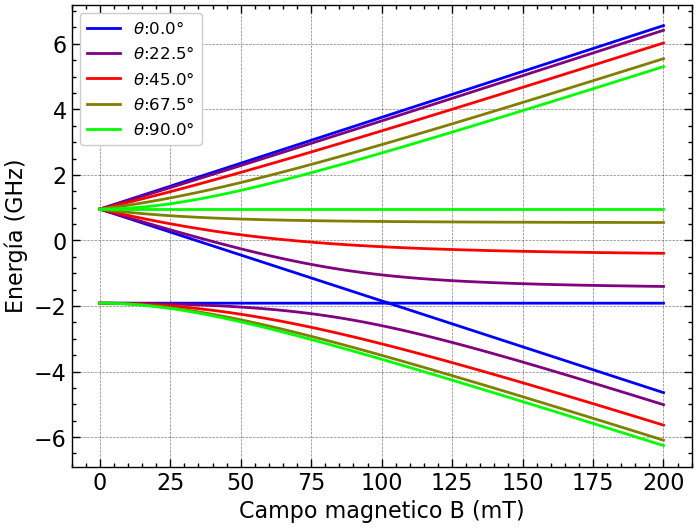

In [17]:
D_eval = 2.87 # En 2.87 GHz 
gamma_eval = 28 # En 28 GHz/T .... (Haz el calculo con )

def autoenergias_calc(B_ini=-500*10**(-6),B_fin=500*10**(-6),pasos=100,
                      theta=2*(np.pi/180),phi = 0*(np.pi/180),E_eval = 2*10**(-3)):
    '''
    Esta función retorna 3 arrays 
    1er array : Las autoenergias con menor 
    2do array : Las autoenergias con intermedio 
    3er array : Las autoenergias con mayor
    '''
    array1 = []
    array2 = []
    array3 = []
    array4 = []
    
    for Bvalor in np.linspace(B_ini,B_fin,pasos):
        # Variables 
        Beval = Bvalor 
    
        # Reemplazar Bx, By, Bz
        Bx_eval = Beval*np.sin(theta)*np.cos(phi)
        By_eval = Beval*np.sin(theta)*np.sin(phi)
        Bz_eval = Beval*np.cos(theta)
    
        # evaluando
        Heval = H.subs({D:D_eval, E:E_eval, gamma:gamma_eval, B_x:Bx_eval, B_y:By_eval, B_z:Bz_eval}) # reemplazando
    
        # calculando autoenergias
        eigenvalores =  Heval.eigenvals()
        # Convertir los autovalores a un array
        '''
        tengo que usar la función ''re'' y no "np.real" porque los valores de autovalores son sympy 
        con esto me aseguro de solo sacar la parte real, aunque el hamiltoniano es hermitico en el algoritmo de sympy 
        te puede salir complejo de parte complejo muy bajo  
        '''

        lista = [re(val) for val in eigenvalores.keys()]
        autovalores = np.sort(lista)
    
        np.array( array1.append(Bvalor) )
        np.array( array2.append(autovalores[0]) )
        np.array( array3.append(autovalores[1]) )
        np.array( array4.append(autovalores[2]) )
        
    return np.array([array1,array2,array3,array4])

##############################################################

parametros_tetha = np.linspace(0, 90,num=5)
colormap = plt.get_cmap('brg', len(parametros_tetha))

for i,tetha_eval in enumerate(parametros_tetha):
    
    # Advertencia ////// No poner E_eval = 0 //// Mi función no esta preparado para ese valor
    autoenergias = autoenergias_calc(B_ini=0,B_fin=2*10**(-1),pasos=100,theta=tetha_eval*(np.pi/180),
                               phi = 0*(np.pi/180),E_eval = 2*10**(-3))
    
    print(f'funciono{i}')
    
    color_val = colormap(i)  # Seleccionar un color de la lista de colores
    plt.plot(autoenergias[0]*10**(3),autoenergias[3],color= color_val)
    plt.plot(autoenergias[0]*10**(3),autoenergias[2],color= color_val)
    plt.plot(autoenergias[0]*10**(3),autoenergias[1],color= color_val,label=rf"$\theta$:{tetha_eval}°")
   
plt.ylabel('Energía (GHz)')
plt.xlabel('Campo magnetico B (mT)')
plt.legend(fontsize=12)
plt.savefig("autoenergiasVScampo_magnetico_para_distintos_theta")
plt.show()

# Modulo de coeficientes para los autovectores vs $(B, \theta)$ / con $\varphi = 0$

- Se quiere visualizar en que rango se puede confiar en que los autectores de $S_z$ son buenos representantes para la física del sistema. 

In [5]:
E_eval = 2*10**(-3)
Y = np.linspace(0, 90,num=90)
X = np.linspace(1*10**(-3),200*10**(-3),100) # tiene que ser maximo 100 porque despues de ese valor ocurre un intercruce 
                                    # y alli mi analisis carece de sentido

B_eval, theta_eval = np.meshgrid(X, Y)   
ejey, ejex = B_eval.shape # extraemos la longitud del eje x y eje y
print(f"El eje x tiene {ejex} valores")
print(f"El eje y tine {ejey} valores")
print(f"El valor de E: {E_eval}")

# una matriz que tenga las mismas dimensiones
Z0 = np.zeros((ejey, ejex)) # populación de \ket{0} asociado al autovalor menor
Z1 = np.zeros((ejey, ejex)) # populación de \ket{-1} asociado al autovalor medio 
Z2 = np.zeros((ejey, ejex)) # populacoón de \ket{+1} asociado al autovalor mayor 

# Definir la cantidad total de iteraciones
total_iteraciones = ejex

# Inicializar la barra de progreso
barra_progreso = tqdm(total=total_iteraciones, desc="Procesando")

# calculamos autovectores 
for j in np.arange(0,ejex):
    for i in np.arange(0,ejey):
        # calcular los autovectores para las autoenergias en orden creciente 
        
        # Variables 
        Beval = B_eval[i,j]
        theta = theta_eval[i,j]*(np.pi/180)
        phi = 0
    
        # Reemplazar Bx, By, Bz
        Bx_eval = Beval*np.sin(theta)*np.cos(phi)
        By_eval = Beval*np.sin(theta)*np.sin(phi)
        Bz_eval = Beval*np.cos(theta)
    
        Heval = H.subs({D:D_eval, E:E_eval, gamma:gamma_eval, B_x:Bx_eval, B_y:By_eval, B_z:Bz_eval}) # reemplazando
        
        # Calcular autovalores y autovectores
        autovalores = Heval.eigenvals()
        autovectores = Heval.eigenvects()
        
        #print(autovectores)
        #print("*")
        # Ordenar los autovalores y autovectores de menor a mayor
        autovectores = sorted(autovectores) # La función sorted ordena los autovectores y los autovalores
        autovectores_ordenados = [autovectores[i][2][0] for i in range(len(autovectores))]
        #print(autovectores)
        
        # Recordar que los estados se forman en orden \ket{psi} = Ca \ket{-1} + Cb \ket{0} + Cb \ket{+1}
        Z0[i,j] = abs(autovectores_ordenados[0][1])**2 # El menor autovalor es del \ket{0} por eso [0][1] 
        Z1[i,j] = abs(autovectores_ordenados[1][2])**2 # El intermedio autovalor es del \ket{-1}
        Z2[i,j] = abs(autovectores_ordenados[2][0])**2 # El mayor autovalor es del \ket{+1}
        #print(B_eval[i,j],theta_eval[i,j],Z0[i,j])
        #print("-"*20)
    
    barra_progreso.update(1) # actualizamos la barra de progreso
    

# Cerrar la barra de progreso cuando haya terminado
barra_progreso.close()

El eje x tiene 100 valores
El eje y tine 90 valores
El valor de E: 0.002


Procesando: 100%|████████████████████████████████████████████████████████████████████| 100/100 [04:52<00:00,  2.92s/it]


In [6]:
barra_progreso.close() # en caso de no cerrar bien entonces correr este codigo

## Población del $|0\rangle$ para el autovalor de menor energia

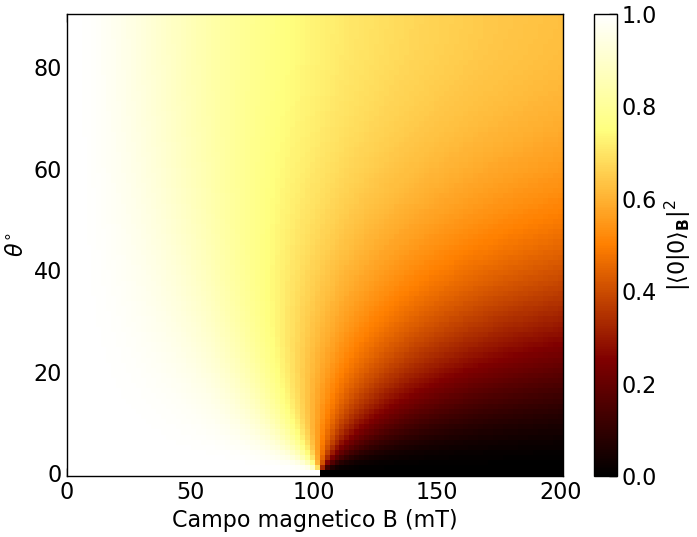

In [7]:
plt.pcolormesh(B_eval*10**(3), theta_eval, Z0, cmap='afmhot', shading='auto',vmin=0, vmax=1)
plt.colorbar(label=r'$|\langle 0|0\rangle_{\mathbf{B}}|^2$')
plt.xlabel('Campo magnetico B (mT)')
plt.ylabel(r'$\theta^{\circ}$')
plt.savefig("población_ket0_para_el_autovalor_de_menor_energiaE=2MHz.png")
plt.show()

## Población del $|-1\rangle$ para el autovalor de energia intermedia 

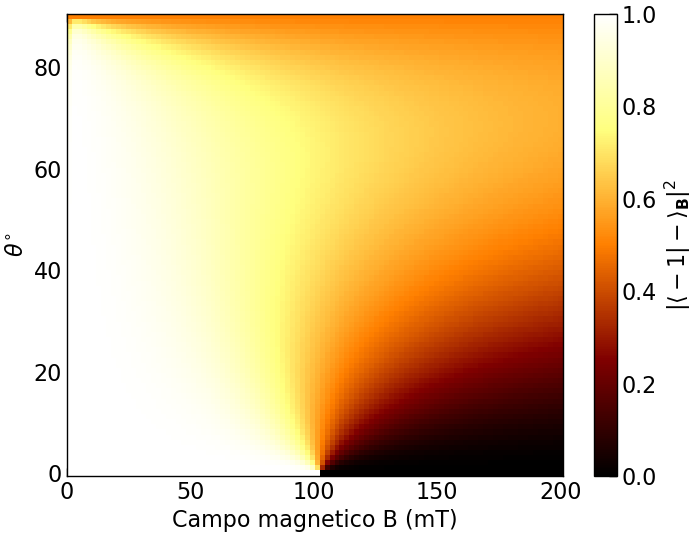

In [8]:
plt.pcolormesh(B_eval*10**(3), theta_eval, Z1, cmap='afmhot', shading='auto',vmin=0, vmax=1)
plt.colorbar(label=r'$|\langle -1|-\rangle _{\mathbf{B}}|^2$')
plt.xlabel('Campo magnetico B (mT)')
plt.ylabel(r'$\theta^{\circ}$')
plt.savefig("población_ket-1_para_el_autovalor_de_energia_intermediaE=2MHz.png")
plt.show()

## Población del $|+1\rangle$ para el autovalor de mayor energia

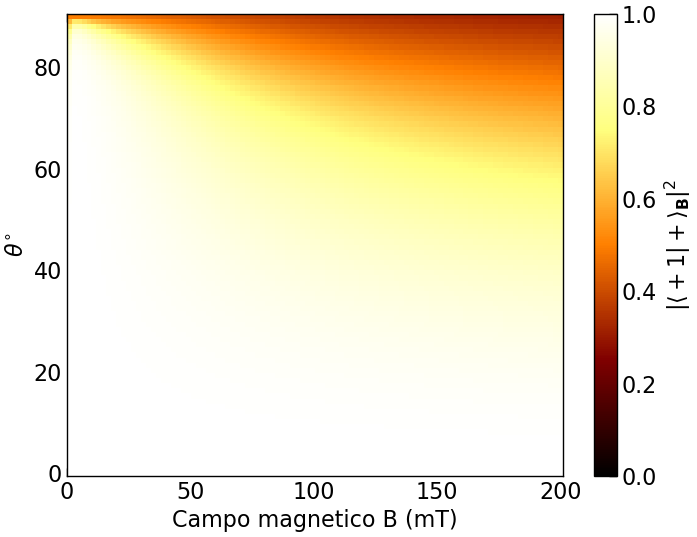

In [9]:
plt.pcolormesh(B_eval*10**(3), theta_eval, Z2, cmap='afmhot', shading='auto',vmin=0, vmax=1)
plt.colorbar(label=r'$|\langle +1|+\rangle_{\mathbf{B}}|^2$')
plt.xlabel('Campo magnetico B (mT)')
plt.ylabel(r'$\theta^{\circ}$')
plt.savefig("población-ket1_para_el_autovalor_de_mayor_energiaE=2MHz.png")
plt.show()